# Data Scraping: ScrapePark página de venta de patinetas

Importamos bibliotecas

In [10]:
from bs4 import BeautifulSoup as bs # Parseo
import requests # Manejo de péticion HTTP
import pandas as pd # Manipulacion de datos
import matplotlib.pyplot as plt # Bibliotecas de graficacion de datos
import seaborn as sns

Obtenemos el código fuente de la página web

In [11]:
url = 'https://scrapepark.org/courses/spanish/'
peticion_http = requests.get(url)
codigo_fuente = peticion_http.text

Segmentamos en sus componentes el código fuente

In [12]:
parseo = bs(codigo_fuente, 'html.parser') # Utilizo el motor `html.parser`

Obtenemos las etiquetas con los métodos de *BeautifulSoup* como `find_all()`, y accedemos al *atributo* `text` para obtener *contenido*

In [13]:
tarjetas = parseo.find_all('div', class_='col-sm-6 col-md-4 col-lg-4') # Obtengo todos los divs donde se almacenan las patinetas
nombres = [tarjeta.h5.get_text(strip=True) for tarjeta in tarjetas] # Obtengo los nombres de los articulos
precios = [tarjeta.h6.get_text(strip=True).replace('$', '') for tarjeta in tarjetas] # # Obtengo los precios de los articulos
patinetas = {'Articulo':nombres, 'Precios':precios} # Creo un diccionario

Obtención de *iframe*

In [14]:
# url_tabla = 'https://scrapepark.org/courses/spanish/table.html'
# request_tabla = requests.get(f'{url}/{url_tabla}')
# html_tabla = request_tabla.text
# soup_tabla = bs(html_tabla, 'html.parser')
# soup_tabla.find('table')

# producto_faltantes = soup_tabla.find_all(['th', 'td'], attrs={'style':'color: red'})
# productos_faltantes = [talle.text for talle in producto_faltantes]

In [15]:
df = pd.DataFrame(patinetas) # DataFrame a partir del diccionario `patinetas`
df

,Articulo,Precios
0,Patineta Nueva 1,75
1,Patineta Usada 2,80
2,Patineta Nueva 3,68
3,Patineta Usada 4,70
4,Patineta Nueva 5,75
5,Patineta Nueva 6,58
6,Patineta Nueva 7,80
7,Patineta Nueva 8,35
8,Patineta Nueva 9,165
9,Patineta Usada 10,54


In [16]:
df.describe()

,Articulo,Precios
count,12,12
unique,12,10
top,Patineta Nueva 1,75
freq,1,2


Graficación con Matplotlib

Text(0.5, 1.0, 'Precios de patinetas en ScrapePark')

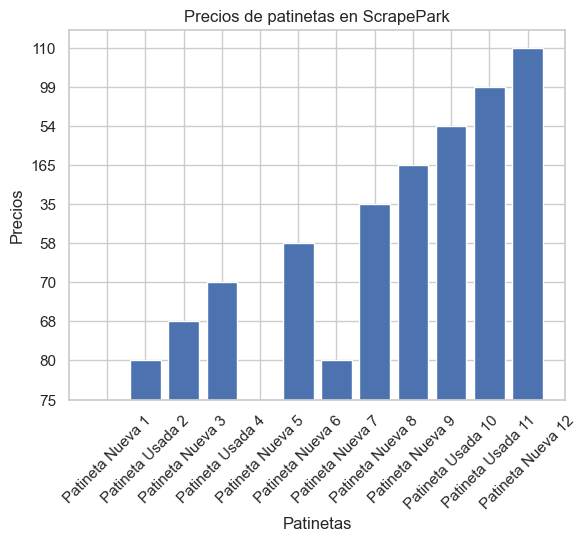

In [17]:
plt.bar(x=df.Articulo, height=df.Precios) # Creación de grafico
plt.xticks(rotation=45) # Roto las etiquetas del eje X
plt.xlabel('Patinetas') # Etiqueta X
plt.ylabel('Precios') # Etiqueta Y
plt.title('Precios de patinetas en ScrapePark') # Titulo del grafico

Graficación con Seaborn

Text(0.5, 1.0, 'Precios de patinetas en ScrapePark')

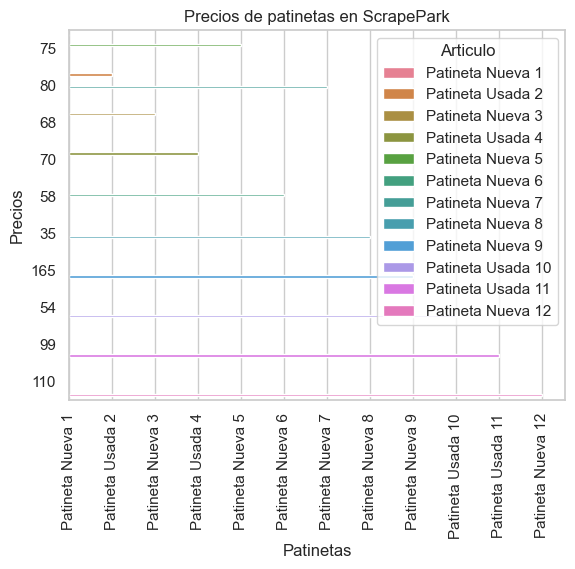

In [18]:
sns.set(style="whitegrid") # Selecciono estilo para el grafico
sns.barplot(x=df.Articulo, y=df.Precios, hue=df.Articulo, orient='h') # Creacion de grafico
plt.xticks(rotation=90) # Roto etiquetas
plt.xlabel('Patinetas') # Etiqueta en el eje X
plt.ylabel('Precios')  # Etiqueta en el eje Y
plt.title('Precios de patinetas en ScrapePark') # Titulo del grafico

#### Realizado por Héctor Rodrigo Quiroz García